In [17]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [18]:
print("TensorFlow version:", tf.__version__)
print(tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


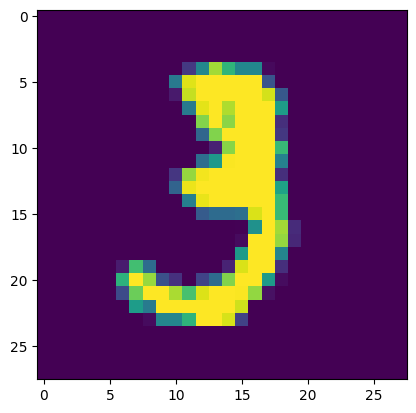

In [27]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# print(x_train[0])
image = x_train[10]
image.shape

plt.imshow(image)

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

2022-11-13 16:23:08.951048: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 16:23:08.952272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 16:23:08.952457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 16:23:08.952577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.09114332,  0.9870565 ,  0.15564762, -0.34171143, -0.51430523,
        -0.5541257 , -0.19791609, -0.6981519 , -0.4634162 ,  0.01382393]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.11187862, 0.27405468, 0.11933311, 0.07257059, 0.06106665,
        0.05868272, 0.08379347, 0.05081133, 0.06425471, 0.1035542 ]],
      dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
loss_fn(y_train[:1], predictions).numpy()

2.83561

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2022-11-13 16:23:10.406551: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-11-13 16:23:10.534385: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 3ms/step - loss: 0.2925 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1444 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1067 - accuracy: 0.9677
Epoch 4/5
 975/1875 [==============>...............] - ETA: 2s - loss: 0.0910 - accuracy: 0.9716

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0696 - accuracy: 0.9779 - 874ms/epoch - 3ms/step


[0.06960301846265793, 0.9779000282287598]